# 1- import pandas and read csv file


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

# 2- explore the data

In [4]:
df.shape

(101766, 50)

In [5]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [61]:
df.size

5088300

In [6]:
list(df)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [7]:
df['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101766, dtype: object

#3- Cleaning, Tiding and Calculations

In [14]:
AGE = df['age'].unique().tolist()

In [15]:
AGE

['[0-10)',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

In [12]:
df1 = df[['patient_nbr','diag_1','readmitted','age']]

## diag_1 is the primary diagnosis of the patient as in ICD9 codes, 250 represents diabetes
- I divded the data set into people that have diabetes and people that do not have diabetes
- I subgrouped them by age groups
- I got the percentage of the readmission of each age group

In [42]:
df_diabetic = df1[df1['diag_1'].str.contains('250')]
grouped_data = df_diabetic.groupby('age')
age_counts = grouped_data['readmitted'].value_counts()
total_rows_in_each_age_group = grouped_data.size()
age_percentage = age_counts / total_rows_in_each_age_group * 100

In [53]:
df_others = df1[~df1['diag_1'].str.contains('250')]
grouped_data_others = df_others.groupby('age')
age_counts_others = grouped_data_others['readmitted'].value_counts()
total_rows_in_each_age_group_others = grouped_data_others.size()
age_percentage_others = age_counts_others / total_rows_in_each_age_group_others * 100

# 4-Visualization

In [89]:
list_readmitted_labels = ['Less Than 30 Days','More Than 30 Days','Not Readmitted']

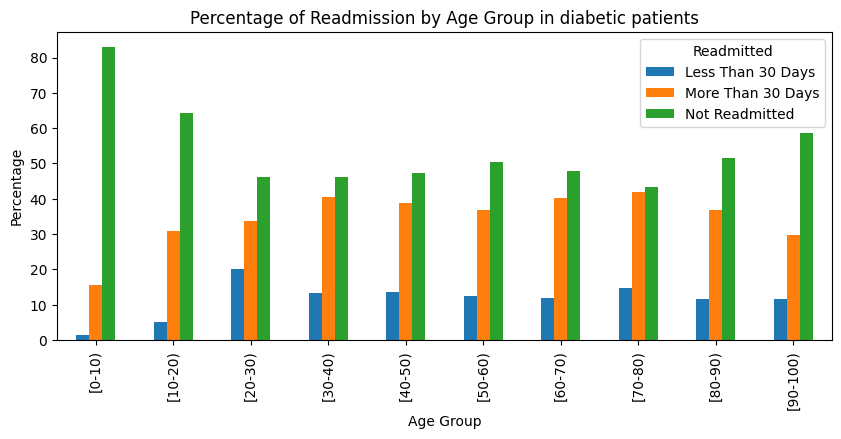

In [91]:
# Convert the Series to a DataFrame for easier plotting
age_percentage_df = age_percentage.unstack()
# Plot the bar plot
ax = age_percentage_df.plot(kind='bar', stacked=False, figsize=(10, 4))
# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Percentage of Readmission by Age Group in diabetic patients")
# Show the legend
plt.legend(list_readmitted_labels ,title="Readmitted", loc="upper right")
# Show the plot
plt.show()

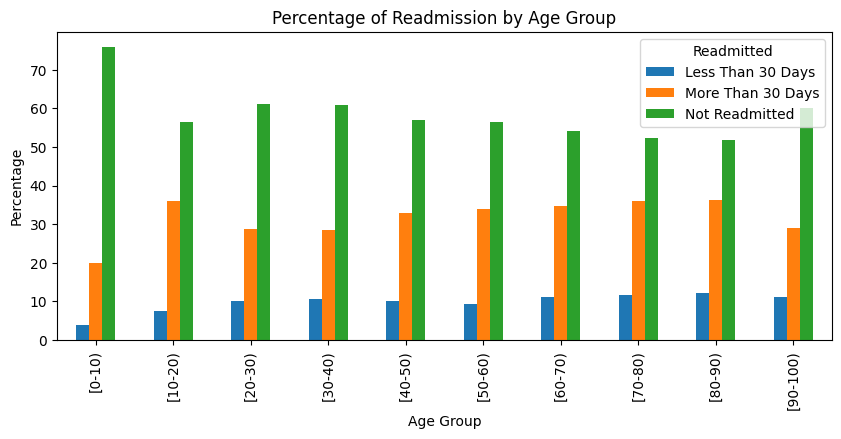

In [92]:
# Convert the Series to a DataFrame for easier plotting
age_percentage_others_df = age_percentage_others.unstack()

# Plot the bar plot
ax = age_percentage_others_df.plot(kind='bar', stacked=False, figsize=(10, 4))

# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Percentage of Readmission by Age Group")

# Show the legend
plt.legend(list_readmitted_labels,title="Readmitted", loc="upper right")

# Show the plot
plt.show()

# 5- Descriptive Statistics
## These are the percentages of each age group in Dataframe format

In [95]:
age_percentage_df

readmitted,<30,>30,NO
age,,,
[0-10),1.470588,15.441176,83.088235
[10-20),5.052632,30.736842,64.210526
[20-30),20.176730,33.578792,46.244477
[30-40),13.355408,40.507726,46.136865
[40-50),13.683483,38.908086,47.408431
[50-60),12.559727,36.928328,50.511945
[60-70),11.918605,40.334302,47.747093
[70-80),14.746882,41.819516,43.433602
[80-90),11.636829,36.956522,51.406650


In [96]:
age_percentage_others_df

readmitted,<30,>30,NO
age,,,
[0-10),4.000000,20.000000,76.000000
[10-20),7.407407,36.111111,56.481481
[20-30),10.122699,28.834356,61.042945
[30-40),10.561171,28.581387,60.857442
[40-50),10.063122,32.957028,56.979849
[50-60),9.397758,34.044709,56.557533
[60-70),11.076894,34.784669,54.138437
[70-80),11.608986,36.045335,52.345679
[80-90),12.104782,36.149863,51.745355


# 6- Conclusion
- Readmission in less than 30 days was higher in the diabetic patients, age group (20 - 30), while it was average in the non diabetic patients of the same age group.
- Both diabetic and non diabetic patients have the highest not readmitted percentage in age group (0 - 10).
- Readmission in more than 30 days was higher in diabetic patients, age groups ( 30 - 40 , 60 - 70 , 70 - 80 ), while it was less in the non diabetic patients in the same age groups.
- It's more likely a diabetic patient is readmitted than a non diabetic patient based on the total number of readmitted patients and non readmitted patients.